<a href="https://colab.research.google.com/github/mcgmed/Tensorflow/blob/main/Recurrent-Neural-Networks-for-NLP/Sarcasm_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from bs4 import BeautifulSoup

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

--2022-11-29 11:35:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2022-11-29 11:35:33 (97.5 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [26]:
datastore[:3]

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1}]

In [4]:
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

table = str.maketrans('', '', string.punctuation)

sentences = [] 
labels = []
urls = []

for item in datastore:
    sentence = item['headline'].lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ""
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + " "
    sentences.append(filtered_sentence)
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

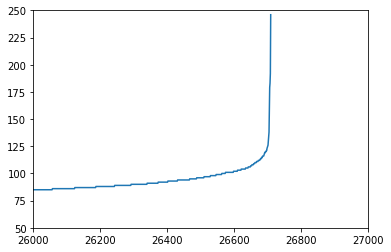

85


In [5]:
xs=[]
ys=[]
current_item=1
for item in sentences:
  xs.append(current_item)
  current_item=current_item+1
  ys.append(len(item))
newys = sorted(ys)

import matplotlib.pyplot as plt
plt.plot(xs,newys)
plt.axis([26000, 27000, 50, 250])
plt.show()

print(newys[26000])

In [6]:
vocab_size = 2000
embedding_dim = 7
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = ""
training_size = 24000
num_epochs = 150

In [7]:
print(f'Length of sentences: {len(sentences)}')

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
print(f'Instances from word index: {list(word_index.items())[:6]}')

wc = tokenizer.word_counts
print(f'Instances from word counts: {list(wc.items())[:6]}')

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

Length of sentences: 26709
Instances from word index: [('', 1), ('new', 2), ('trump', 3), ('man', 4), ('not', 5), ('just', 6)]
Instances from word counts: [('former', 96), ('versace', 1), ('store', 47), ('clerk', 9), ('sues', 16), ('secret', 83)]


Instances from new list: [('new', 1376), ('trump', 1170), ('man', 1135), ('not', 668), ('just', 528), ('will', 502)]


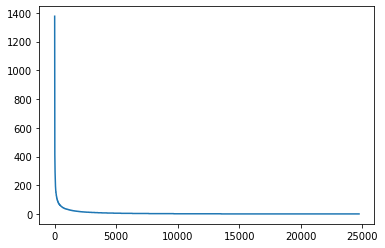

In [8]:
from collections import OrderedDict

newlist = (OrderedDict(sorted(wc.items(), key=lambda t: t[1], reverse=True)))
print(f'Instances from new list: {list(newlist.items())[:6]}')
xs=[]
ys=[]
curr_x = 1
for item in newlist:
  xs.append(curr_x)
  curr_x=curr_x+1
  ys.append(newlist[item])

plt.plot(xs,ys)
plt.show()

In [9]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 7)           14000     
                                                                 
 bidirectional (Bidirectiona  (None, 200)              86400     
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                6432      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 106,865
Trainable params: 106,865
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/150
750/750 [==============================] - 16s 12ms/step - loss: 0.9393 - accuracy: 0.6859 - val_loss: 0.5117 - val_accuracy: 0.7601
Epoch 2/150
750/750 [==============================] - 8s 11ms/step - loss: 0.4689 - accuracy: 0.7851 - val_loss: 0.4875 - val_accuracy: 0.7693
Epoch 3/150
750/750 [==============================] - 8s 11ms/step - loss: 0.4381 - accuracy: 0.8025 - val_loss: 0.4751 - val_accuracy: 0.7778
Epoch 4/150
750/750 [==============================] - 8s 11ms/step - loss: 0.4240 - accuracy: 0.8072 - val_loss: 0.4677 - val_accuracy: 0.7874
Epoch 5/150
750/750 [==============================] - 8s 11ms/step - loss: 0.4151 - accuracy: 0.8119 - val_loss: 0.4616 - val_accuracy: 0.7900
Epoch 6/150
750/750 [==============================] - 8s 11ms/step - loss: 0.4213 - accuracy: 0.8089 - val_loss: 0.4777 - val_accuracy: 0.7852
Epoch 7/150
750/750 [==============================] - 9s 12ms/step - loss: 0.3908 - accuracy: 0.8260 - val_loss: 0.4829 - val_accuracy

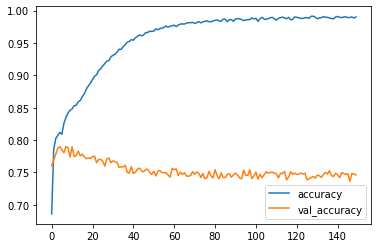

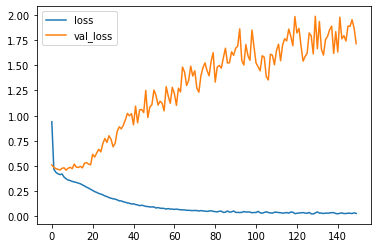

In [13]:
def plot_graphs(history, string):
  plt.plot(history.history[string]);
  plt.plot(history.history['val_'+string]);
  plt.legend([string, 'val_'+string]);
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [14]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[2]))
print(training_sentences[2])
print(labels[2])

mom starting fear sons  series  thing will  ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting fear sons web series closest thing will grandchild 
1


In [22]:
e = model.layers[0]
weights = e.get_weights()[0]
weights.shape # shape: (vocab_size, embedding_dim)

(2000, 7)

In [23]:
print(reverse_word_index[2])
print(weights[2])

new
[-0.25798702 -0.03797948  0.17335734  0.12450952 -0.01448106  0.15106018
 -0.2811939 ]


In [25]:
test_sentences = ["It Was, For, Uh, Medical Reasons, Says Doctor To Boris Johnson, Explaining Why They Had To Give Him Haircut",
                  "It's a beautiful sunny day",
                  "I lived in Ireland, so in High School they made me learn to speak and write in Gaelic",
                  "Census Foot Soldiers Swarm Neighborhoods, Kick Down Doors To Tally Household Sizes"]
sequences = tokenizer.texts_to_sequences(test_sentences)
print(sequences)

padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(padded)

predictions = model.predict(padded)
print(predictions)

[[1, 1, 1, 1, 1260, 506, 16, 767, 1, 1, 1374, 1, 1, 1, 1, 1, 174, 1, 1], [1, 1, 448, 1, 14], [1, 1, 1, 1, 1, 1, 92, 51, 1, 136, 1, 969, 1, 1109, 1, 1651, 1, 1], [1, 1288, 1, 1, 1, 1985, 1, 1, 1, 1, 1, 1]]
[[   1    1    1    1 1260  506   16  767    1    1 1374    1    1    1
     1    1  174    1    1    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   1    1  448    1   14    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0 